# Auckland House Prices Analysis

In [7]:
import json
import sys

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [8]:
house_prices = pd.read_csv('house_prices.csv')
house_prices

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey


In [9]:
house_prices.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area       object
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
dtype: object

In [10]:
house_prices ['Land area'] = house_prices['Land area'].str.extract('(\d+)').astype(float)

In [11]:
house_prices

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100.0,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531.0,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024.0,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80.0,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa
9,4,2.0,"39a Keegan Drive Massey, Auckland",204.0,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey


There are some houses that have 17 bedrooms.

In [12]:
def get_currentPop(lat, long):
    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = {
        'key': 'da16bd32428347e19714f286b9884be7',
        'layer': '104612',
        'x' : str(long),
        'y' : str(lat)
    }

    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        print(response.status_code)
        return response.status_code
    
    currentPop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    print(currentPop)
    return currentPop
    

In [13]:

get_currentPop(-37.012920,174.904069)

174


174

Finding Current Population for every Location

In [14]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [15]:
sample = house_prices.head(5)

In [16]:
sample['Current Population'] = sample.apply(lambda row: get_currentPop(row.Latitude, row.Longitude), axis=1)

174
129
129
120
231


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
sample

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [18]:
house_prices['Current Population'] = house_prices.apply(lambda row: get_currentPop(row.Latitude, row.Longitude), axis=1)

174
129
129
120
231
195
102
162
126
141
141
141
189
171
174
183
183
219
219
219
135
213
162
198
132
90
189
213
198
168
132
132
132
132
204
189
282
123
153
177
225
189
234
201
114
174
195
195
162
189
288
189
132
201
180
180
189
189
105
120
126
180
189
189
189
267
168
138
174
123
243
234
228
228
168
162
147
234
234
180
186
231
276
18
18
18
18
18
18
18
18
192
150
132
132
108
141
129
132
150
219
219
240
183
183
201
99
147
186
30
30
153
171
222
174
216
117
129
186
144
180
150
237
249
132
219
219
189
129
213
183
147
162
186
189
93
249
108
174
93
123
231
237
237
141
141
96
168
168
177
237
237
168
195
132
90
102
147
111
210
201
135
102
102
147
123
195
219
219
189
189
249
162
195
258
414
414
414
204
225
225
174
129
114
114
186
132
153
255
105
198
186
186
189
153
276
168
306
306
246
273
273
222
174
135
147
174
153
216
228
279
279
147
231
180
180
129
789
789
255
123
159
183
174
153
198
117
117
123
111
243
177
219
123
198
108
186
231
216
150
144
129
90
210
210
219
189
225
141
87
177
132
123
255
11

In [19]:
!curl https://www.otago.ac.nz/wellington/otago730395.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1178k  100 1178k    0     0   257k      0  0:00:04  0:00:04 --:--:--  338k


In [20]:
house_prices.to_csv('final_dataset.csv', index=False)

In [21]:
deprivation = pd.read_excel('otago730395.xlsx')

In [22]:
house_prices.merge(deprivation, left_on='SA1', right_on='SA12018_code')

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100.0,1050000,-36.943929,174.780501,7007917,63,15,...,30,39,Mangere Bridge,195,7007917,4.0,942.0,195,146800,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531.0,2525000,-36.849239,174.734451,7004908,33,12,...,15,9,Ponsonby,102,7004908,4.0,951.0,102,130400,Ponsonby West
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024.0,1400000,-36.907700,174.796042,7005903,36,33,...,12,24,One Tree Hill,162,7005903,4.0,951.0,162,142800,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80.0,475000,-37.033322,174.898113,7009808,45,27,...,12,12,Manurewa,126,7009808,10.0,1164.0,126,160900,Manurewa South
9,4,2.0,"39a Keegan Drive Massey, Auckland",204.0,660000,-36.846208,174.620794,7003826,30,27,...,24,12,Massey,141,7003826,6.0,988.0,141,122500,Massey East


CheckPoint Yay

In [23]:
deprivation.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


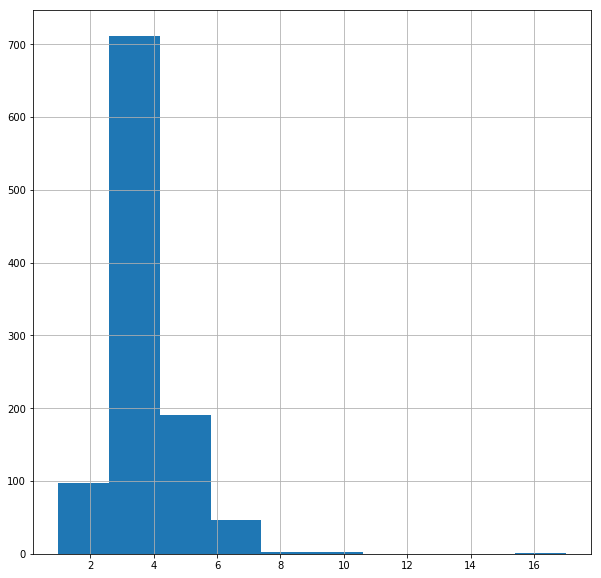

In [24]:
house_prices['Bedrooms'].hist(figsize=(10, 10))

In [25]:
final_dataset = pd.read_csv('final_dataset.csv')

In [26]:
final_dataset.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [27]:
final_dataset.merge(deprivation, left_on='SA1', right_on='SA12018_code')

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100.0,1050000,-36.943929,174.780502,7007917,63,15,...,30,39,Mangere Bridge,195,7007917,4.0,942.0,195,146800,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531.0,2525000,-36.849239,174.734451,7004908,33,12,...,15,9,Ponsonby,102,7004908,4.0,951.0,102,130400,Ponsonby West
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024.0,1400000,-36.907700,174.796042,7005903,36,33,...,12,24,One Tree Hill,162,7005903,4.0,951.0,162,142800,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80.0,475000,-37.033322,174.898113,7009808,45,27,...,12,12,Manurewa,126,7009808,10.0,1164.0,126,160900,Manurewa South
9,4,2.0,"39a Keegan Drive Massey, Auckland",204.0,660000,-36.846208,174.620794,7003826,30,27,...,24,12,Massey,141,7003826,6.0,988.0,141,122500,Massey East


Save merged final dataset

In [28]:
final_dataset2 = final_dataset.merge(deprivation, left_on='SA1', right_on='SA12018_code')

In [29]:
final_dataset2.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North


In [30]:
final_dataset2.shape

(1051, 22)

In [31]:
final_dataset2.isnull().values.any()

True

In [32]:
missing_values_count = final_dataset2.isnull().sum()

In [33]:
missing_values_count

Bedrooms              0
Bathrooms             2
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               1
Current Population    0
SA12018_code          0
NZDep2018             0
NZDep2018_Score       0
URPopnSA1_2018        0
SA22018_code          0
SA22018_name          0
dtype: int64

In [34]:
final_dataset2['Bathrooms'] = final_dataset2['Bathrooms'].fillna(0)

In [138]:
final_dataset2.shape

(1050, 18)

In [35]:
final_dataset2.isnull().sum()

Bedrooms              0
Bathrooms             0
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               1
Current Population    0
SA12018_code          0
NZDep2018             0
NZDep2018_Score       0
URPopnSA1_2018        0
SA22018_code          0
SA22018_name          0
dtype: int64

In [40]:
final_dataset2 = final_dataset2.dropna()

In [41]:
final_dataset2.isnull().sum()

Bedrooms              0
Bathrooms             0
Address               0
Land area             0
CV                    0
Latitude              0
Longitude             0
SA1                   0
0-19 years            0
20-29 years           0
30-39 years           0
40-49 years           0
50-59 years           0
60+ years             0
Suburbs               0
Current Population    0
SA12018_code          0
NZDep2018             0
NZDep2018_Score       0
URPopnSA1_2018        0
SA22018_code          0
SA22018_name          0
dtype: int64

In [135]:
final_dataset2.dtypes


Bedrooms                int64
Bathrooms             float64
Address                object
Land area             float64
CV                      int64
Latitude              float64
Longitude             float64
SA1                     int64
0-19 years              int64
20-29 years             int64
30-39 years             int64
40-49 years             int64
50-59 years             int64
60+ years               int64
Suburbs                object
Current Population      int64
NZDep2018             float64
SA22018_name           object
dtype: object

In [137]:
final_dataset2.shape

(1050, 18)

In [42]:
final_dataset2.head()


,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,Current Population,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,174,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,129,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,231,7008902,9.0,1091.0,231,157700,Clover Park North


In [45]:
final_dataset2.drop(['SA12018_code', 'NZDep2018_Score','URPopnSA1_2018','SA22018_code'], axis=1, inplace=True)

In [139]:
final_dataset2.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Current Population,NZDep2018
count,1050.00000,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,3.78000,2.070476,855.766667,1.388137e+06,-36.894378,174.798737,7.006324e+06,47.568571,28.985714,27.062857,24.131429,22.600000,29.331429,179.937143,5.060000
std,1.16682,0.996077,1588.417902,1.183334e+06,0.128372,0.118064,2.587538e+03,24.695815,21.035509,17.972223,10.946349,10.202899,21.794881,71.089304,2.912322
min,1.00000,0.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.00000,1.000000,320.000000,7.800000e+05,-36.950644,174.720427,7.004418e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.00000,2.000000,570.500000,1.080000e+06,-36.893250,174.798361,7.006329e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.00000,3.000000,825.000000,1.600000e+06,-36.855900,174.880908,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.00000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


In [46]:
final_dataset2.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Current Population,NZDep2018,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0,Clover Park North


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


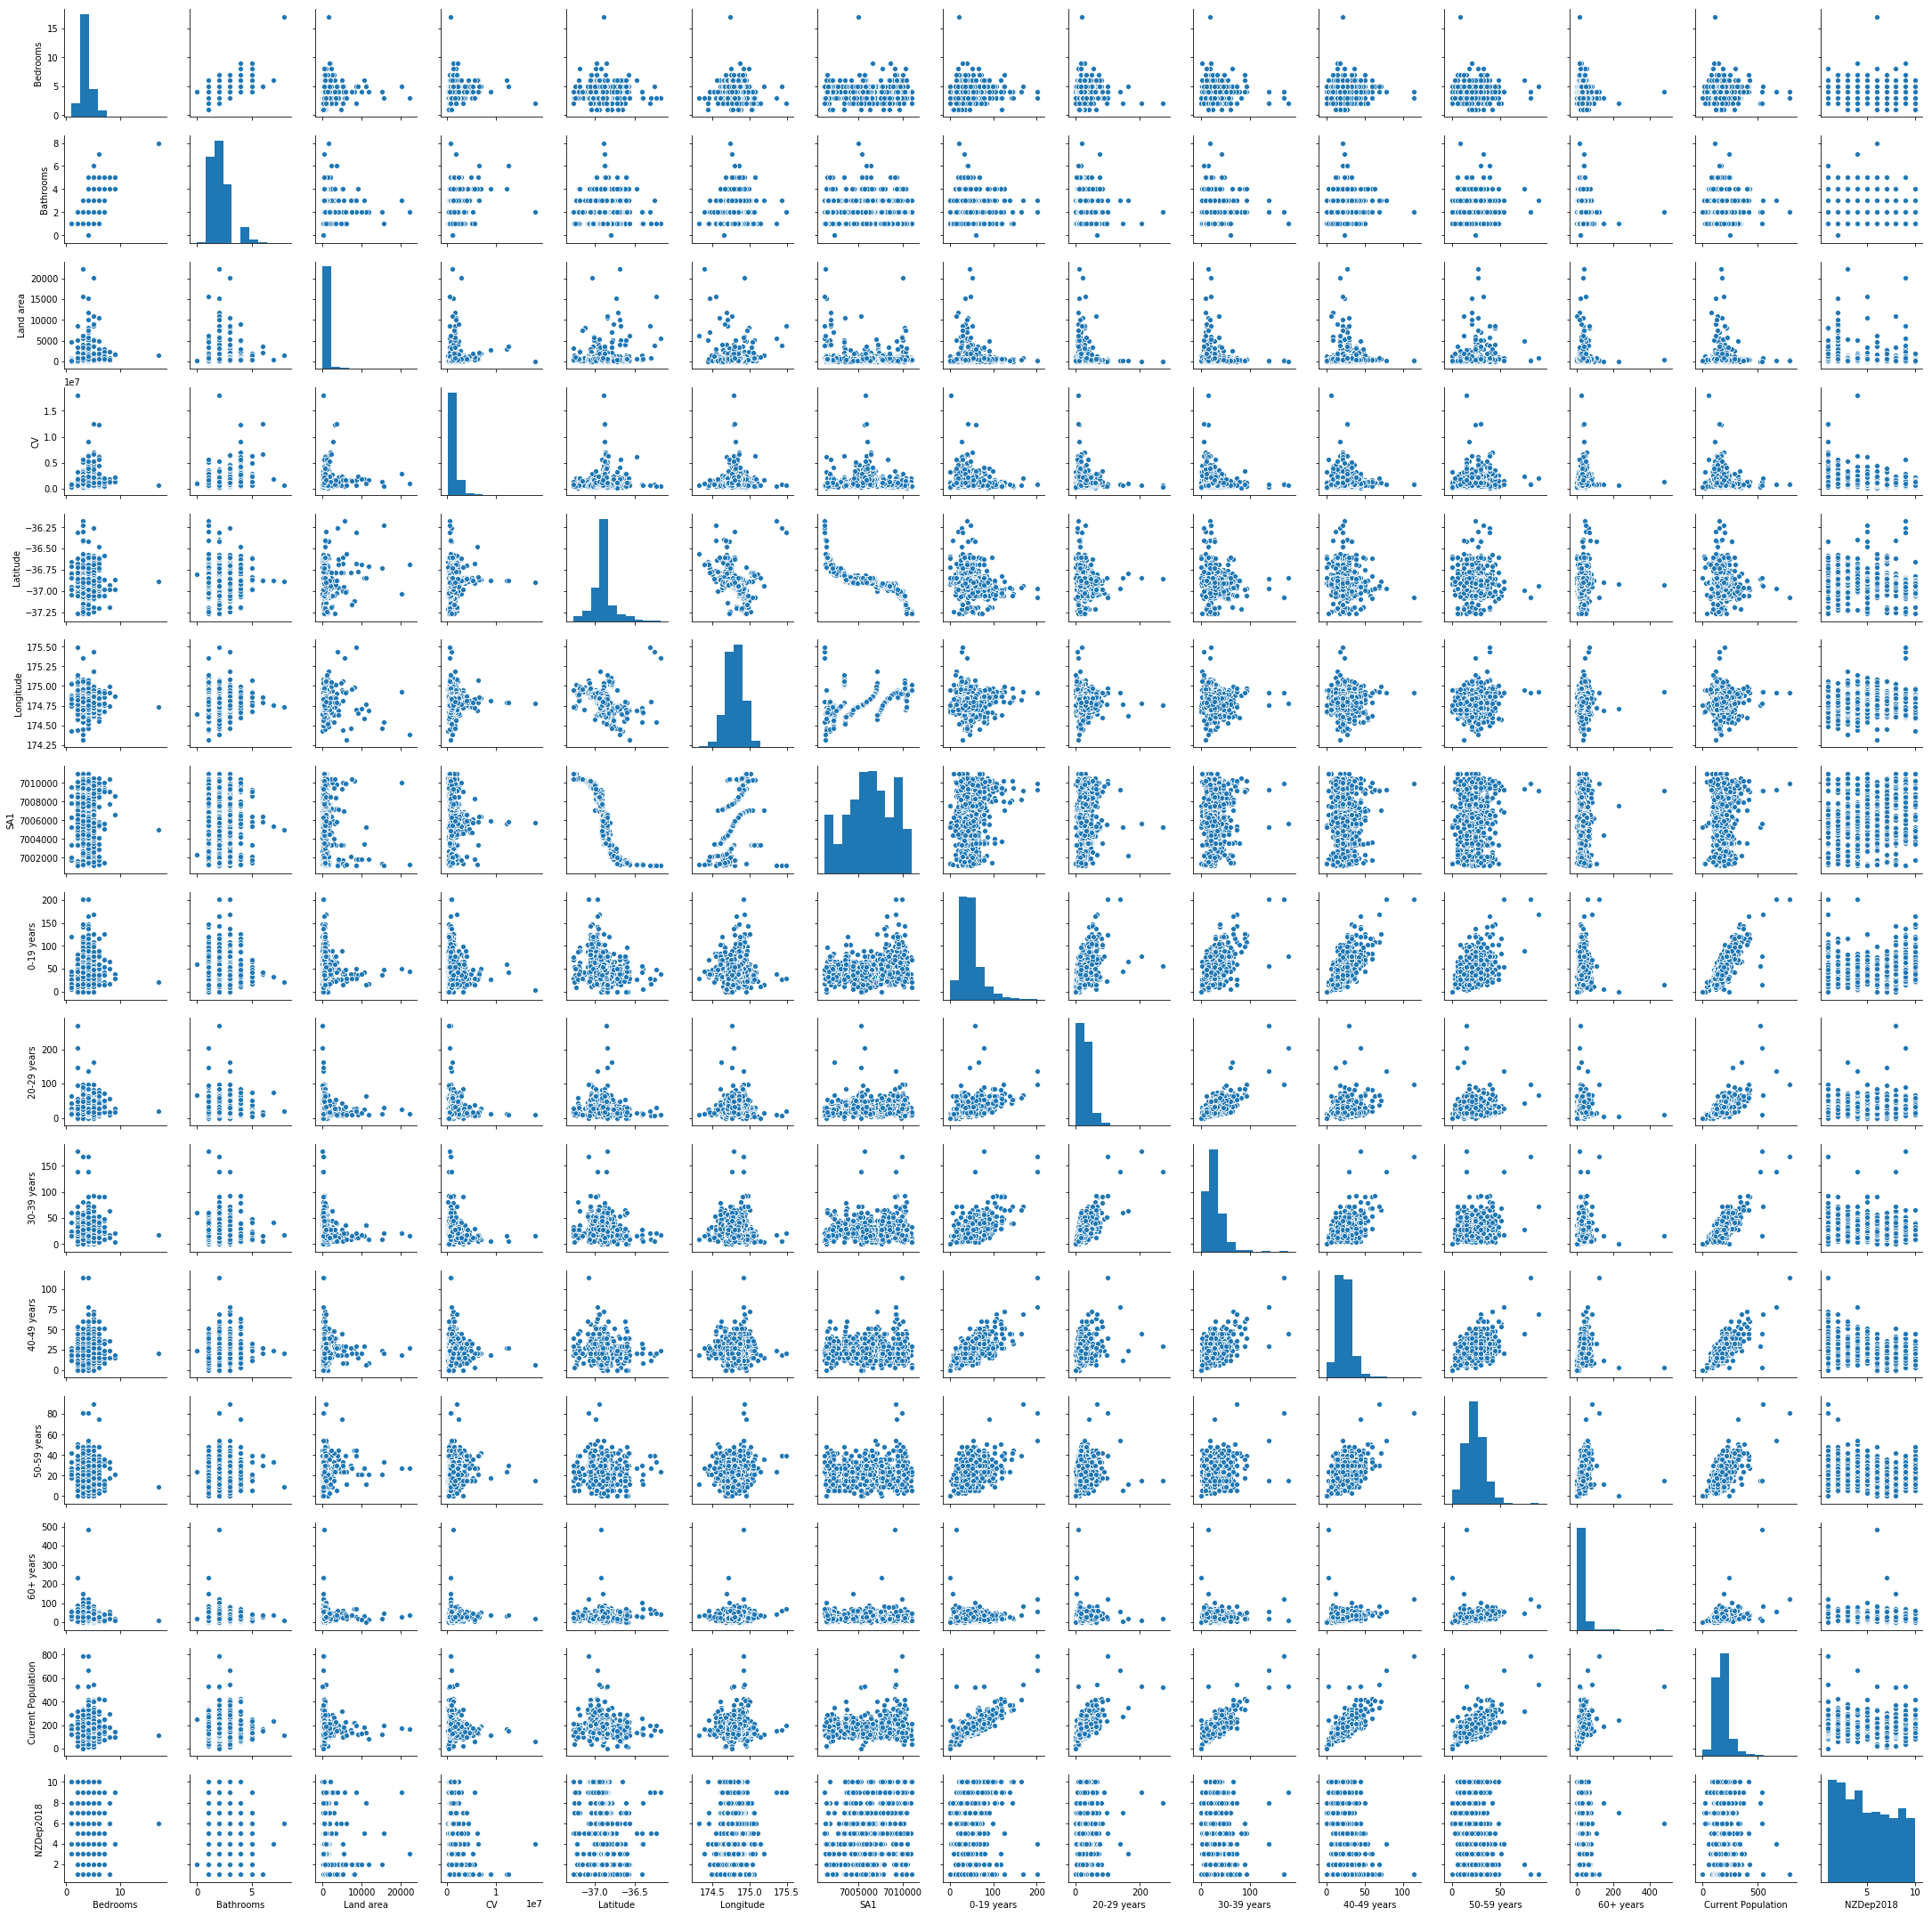

In [47]:
sns.pairplot(final_dataset2, size=2.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67797de978>,
      dtype=object)

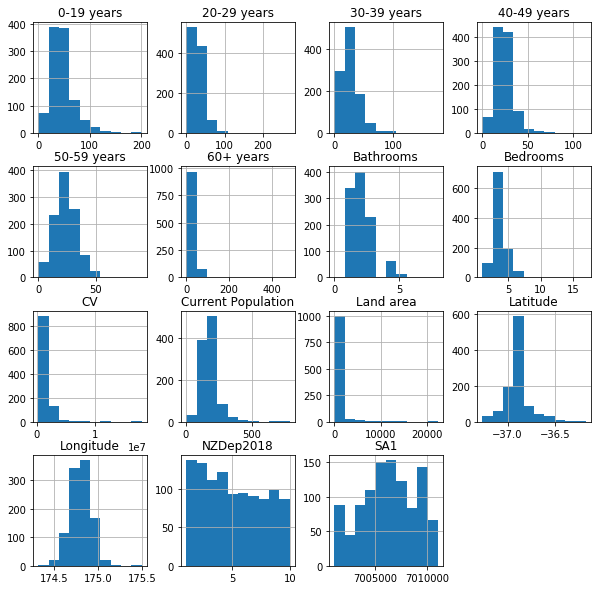

In [48]:
final_dataset2.hist(figsize=(10,10))

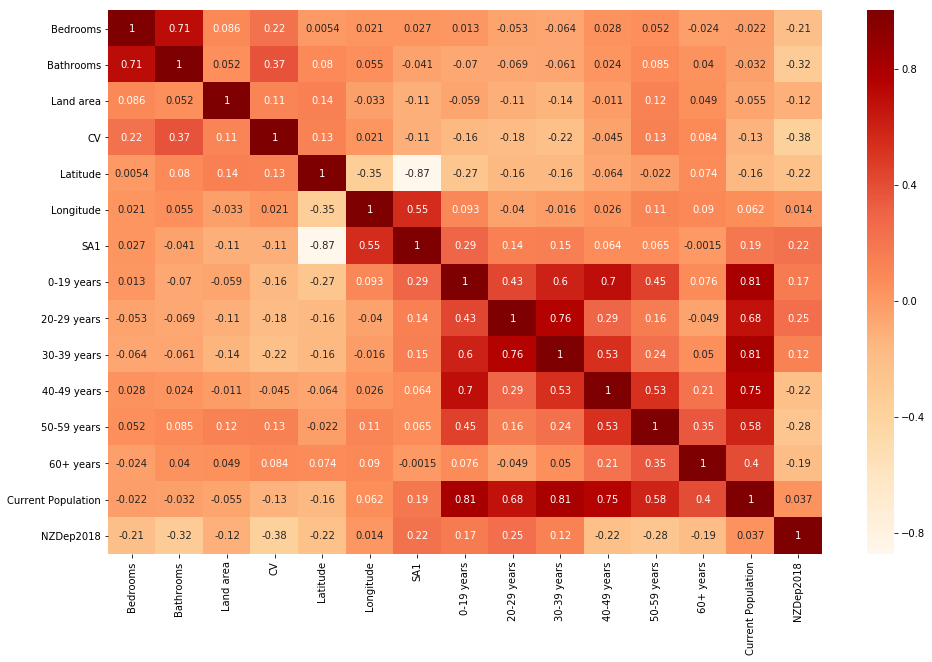

In [49]:
ax, fig = plt.subplots(figsize=(16, 10))
correlation_matrix = final_dataset2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

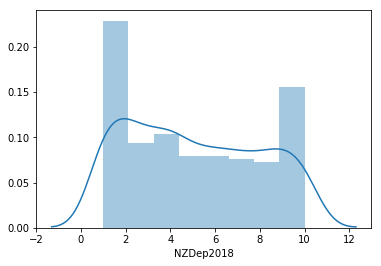

In [54]:
sns.distplot(final_dataset2['NZDep2018'])

In [124]:
from sklearn.model_selection import train_test_split

# x = final_dataset2.drop(['CV','Address','Suburbs','SA22018_name'], axis=1)
x = final_dataset2[['Bedrooms', 'Bathrooms', 'Land area','Current Population', 'NZDep2018']]
x.head()



,Bedrooms,Bathrooms,Land area,Current Population,NZDep2018
0,5,3.0,714.0,174,6.0
1,5,3.0,564.0,129,1.0
2,6,4.0,626.0,129,1.0
3,2,1.0,65.0,120,2.0
4,3,1.0,601.0,231,9.0


In [125]:
# y = final_dataset2['CV']
y = np.log(final_dataset2['CV'])
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: CV, dtype: float64

In [126]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.4,random_state=42)


In [127]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()


In [128]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
model.coef_

array([-5.21702293e-03,  1.77568778e-01,  1.02305111e-05, -8.42480172e-04,
       -8.54738665e-02])

In [130]:
predicted = model.predict(test_x)

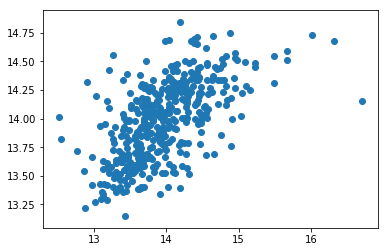

In [131]:
plt.scatter(test_y,predicted)

In [132]:
model.score(test_x, test_y)

0.34628905940988153